<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°02

## Objetivos del laboratorio

* Reforzar conceptos básicos de clasificación.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.xenonstack.com/wp-content/uploads/xenonstack-credit-card-fraud-detection.png" width="360" height="360" align="center"/>


El conjunto de datos se denomina `creditcard.csv` y consta de varias columnas con información acerca del fraude de tarjetas de crédito, en donde la columna **Class** corresponde a: 0 si no es un fraude y 1 si es un fraude.

En este ejercicio se trabajará el problemas de  clases desbalancedas. Veamos las primeras cinco filas dle conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","creditcard.csv"), sep=";")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
2,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
3,10.0,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
4,12.0,1.103215,-0.040296,1.267332,1.289091,-0.735997,0.288069,-0.586057,0.189380,0.782333,...,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,12.99,0


Analicemos el total de fraudes respecto a los casos que nos son fraudes:


In [3]:
# calcular proporciones
df_count = pd.DataFrame()
df_count["fraude"] =["no","si"]
df_count["total"] = df["Class"].value_counts() 
df_count["porcentaje"] = 100*df_count["total"] /df_count["total"] .sum()

df_count

,fraude,total,porcentaje
0,no,50000,99.025588
1,si,492,0.974412


Se observa que menos del 1% corresponde a registros frudulentos. La pregunta que surgen son:

* ¿ Cómo deben ser el conjunto de entrenamiento y de testeo?
* ¿ Qué modelos ocupar?
* ¿ Qué métricas ocupar?

Por ejemplo, analicemos el modelos de regresión logística y apliquemos el procedimiento estándar:

In [4]:
# datos 
y = df.Class
X = df.drop('Class', axis=1)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


# Creando el modelo
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# predecir
lr_pred = lr.predict(X_test)

# calcular accuracy
accuracy_score(y_test, lr_pred)

0.9961181969420898

En general el modelo tiene un **accuracy** del 99,9%, es decir, un podría suponer que el modelo predice casi perfectamente, pero eso esta lejos de ser así.  Para ver por qué es necesario seguir los siguientes pasos:

### 1. Cambiar la métrica de rendimiento

El primer paso es comparar con distintas métricas, para eso ocupemos las 4 métricas clásicas abordadas en el curso:
* accuracy
* precision
* recall
* f-score

En este punto deberá poner las métricas correspondientes y comentar sus resultados.

In [5]:
# metrics

#from metrics_classification import *

y_true =  list(y_test)
y_pred = list(lr.predict(X_test))

print('\nMatriz de confusion:\n ')
conf_mat_lr = confusion_matrix(y_true,y_pred)
print(conf_mat_lr)

metr_lr = [accuracy_score(y_true, y_pred), recall_score(y_true, lr_pred), precision_score(y_true, lr_pred),
          f1_score(y_true, lr_pred)]
print('\nMetricas:\n ')
print('accuracy:   ',metr_lr[0])
print('recall:     ',metr_lr[1])
print('precision:  ',metr_lr[2])
print('f-score:    ',metr_lr[3])
print("")


Matriz de confusion:
 
[[12471    16]
 [   33   103]]

Metricas:
 
accuracy:    0.9961181969420898
recall:      0.7573529411764706
precision:   0.865546218487395
f-score:     0.807843137254902



El modelo presenta gran exactitud (**accuracy**) ya que el número de fraudes originales es bastante bajo en comparación con la muestra y asi se obtuvo un número grande de verdaderos positivos en comparación con los verdaderos negativos y los errores (esto ya fue explicado por el profesor en enunciado).

Al tener mayor precisión que exhaustividad (**recall**) se puede decir que existe una mayor tasa de verdaderos positivos a falsos positivos que verdaderos positivos con respecto a los falsos negativos, lo que se puede observar mas claramente en la matriz de confusión (el numero de falsos positivos fue el doble que el de falsos negativos).

El **F-score** se comparará con otros modelos aunque 0.8 es, a priori, un valor bastante bueno.


AUC: 0.92


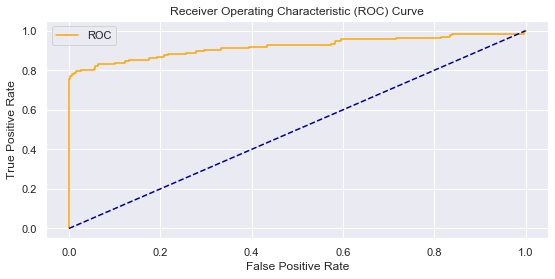

In [6]:
# graficar curva roc

def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(9,4))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# calcular score AUC

probs = lr.predict_proba(X_test) # predecir probabilidades para X_test
probs_tp = probs[:, 1] # mantener solo las probabilidades de la clase positiva 
       
auc = roc_auc_score(y_test, probs_tp)  # calcular score AUC 

print('AUC: %.2f' % auc)

# calcular curva ROC

fpr, tpr, thresholds = roc_curve(y_test, probs_tp) # obtener curva ROC
lrplot = plot_roc_curve(fpr, tpr)
    

### 2. Cambiar algoritmo

El segundo paso es comparar con distintos modelos. Debe tener en cuenta que el modelo ocupado resuelva el problema supervisado de clasificación.

En este punto deberá ajustar un modelo de **random forest**, aplicar las métricas y comparar con el modelo de regresión logística.

In [7]:
# train model

# datos 
y = df.Class
X = df.drop('Class', axis=1)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# Creando el modelo
rfc =  RandomForestClassifier(max_depth=5, n_estimators=500, max_features=1).fit(X_train, y_train) # algoritmo random forest
 
# predecir
rfc_pred = rfc.predict(X_test)

# calcular accuracy
accuracy_score(y_test, rfc_pred)

0.9955636536481026

In [8]:
# metrics

y_true =  list(y_test)
y_pred = list(rfc.predict(X_test)) # predicciones con random forest


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true,y_pred))
print('recall:     ',recall_score(y_true,y_pred))
print('precision:  ',precision_score(y_true,y_pred))
print('f-score:    ',f1_score(y_true,y_pred))
print("")


Matriz de confusion:
 
[[12487     0]
 [   56    80]]

Metricas:
 
accuracy:    0.9955636536481026
recall:      0.5882352941176471
precision:   1.0
f-score:     0.7407407407407407



El modelo **random forest** presenta un leve decrecimiento de la exactitud. 

Por otro lado, la exhaustividad ha bajado con respecto al modelo de regresion logística, esto se debe a que aumentaron los falsos negativos.

El modelo predijo cero falsos positivos por lo que la precisión es perfecta.

Así, el **F-score** disminuye marginalmente en comparación al modelo anterior.

AUC: 0.96


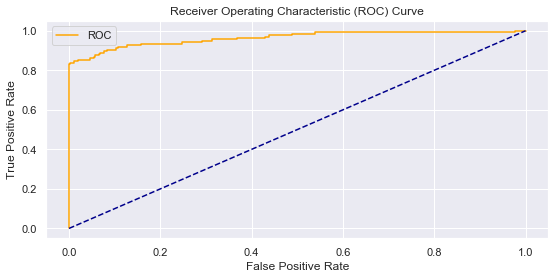

In [9]:
# calcular score AUC

probs = rfc.predict_proba(X_test) # predecir probabilidades para X_test
probs_tp = probs[:, 1] # mantener solo las probabilidades de la clase positiva 
       
auc = roc_auc_score(y_test, probs_tp)  # calcular score AUC 

print('AUC: %.2f' % auc)

# calcular curva ROC

fpr, tpr, thresholds = roc_curve(y_test, probs_tp) # obtener curva ROC
plot_roc_curve(fpr, tpr)

### 3. Técnicas de remuestreo: sobremuestreo de clase minoritaria

El tercer paso es ocupar ténicas de remuestreo, pero sobre la clase minoritaria. Esto significa que mediantes ténicas de remuestreo trataremos de equiparar el número de elementos de la clase minoritaria a la clase mayoritaria.

In [10]:
from sklearn.utils import resample

# concatenar el conjunto de entrenamiento
X = pd.concat([X_train, y_train], axis=1)

# separar las clases
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# remuestrear  clase minoritaria
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# recombinar resultados
upsampled = pd.concat([not_fraud, fraud_upsampled])

# chequear el número de elementos por clases
upsampled.Class.value_counts()

1    37513
0    37513
Name: Class, dtype: int64

In [11]:
# datos de entrenamiento sobre-balanceados
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

Ocupando estos nuevos conjunto de entrenamientos, vuelva a aplicar el modelo de regresión logística y calcule las correspondientes métricas. Además, justifique las ventajas y desventjas de este procedimiento.

In [12]:
upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train) # algoritmo de regresion logistica

# metrics

y_true =  list(y_test)
y_pred = list(upsampled.predict(X_test))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true,y_pred))
print('recall:     ',recall_score(y_true,y_pred))
print('precision:  ',precision_score(y_true,y_pred))
print('f-score:    ',f1_score(y_true,y_pred))
print("")


Matriz de confusion:
 
[[12200   287]
 [   12   124]]

Metricas:
 
accuracy:    0.976313079299691
recall:      0.9117647058823529
precision:   0.30170316301703165
f-score:     0.45338208409506403



El número de falsos positivos aumenta en un order de magnitud, mientras que la exhaustividad se reduce a menos de la mitad (con respecto a los resultados obtenidos al utilizar el modelo logistico sin remuestreo). Esto aumenta la exhaustividad pero reduce de sobremanera la precision y por tanto el f-score. 

AUC: 0.97


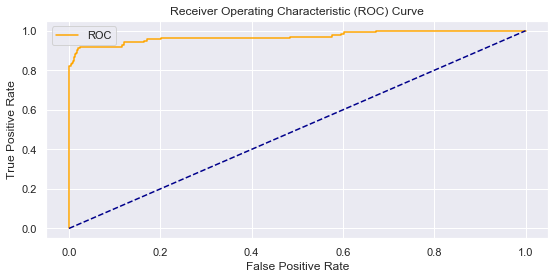

In [13]:
# calcular score AUC

probs = upsampled.predict_proba(X_test) # predecir probabilidades para X_test
probs_tp = probs[:, 1] # mantener solo las probabilidades de la clase positiva 
       
auc = roc_auc_score(y_test, probs_tp)  # calcular score AUC 

print('AUC: %.2f' % auc)

# calcular curva ROC

fpr, tpr, thresholds = roc_curve(y_test, probs_tp) # obtener curva ROC
plot_roc_curve(fpr, tpr)

### 4. Técnicas de remuestreo - Ejemplo de clase mayoritaria

El cuarto paso es ocupar ténicas de remuestreo, pero sobre la clase mayoritaria. Esto significa que mediantes ténicas de remuestreo trataremos de equiparar el número de elementos de la clase mayoritaria  a la clase minoritaria.

In [14]:
# remuestreo clase mayoritaria

not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# recombinar resultados
downsampled = pd.concat([not_fraud_downsampled, fraud])

# chequear el número de elementos por clases
downsampled.Class.value_counts()

1    356
0    356
Name: Class, dtype: int64

In [15]:
# datos de entrenamiento sub-balanceados

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

Ocupando estos nuevos conjunto de entrenamientos, vuelva a aplicar el modelos de regresión logística y calcule las correspondientes métricas. Además, justifique las ventajas y desventjas de este procedimiento.

In [16]:
undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train) # algoritmo de regresion logistica # modelo de regresi+on logística

# metrics

y_true =  list(y_test)
y_pred = list(undersampled.predict(X_test))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true,y_pred))
print('recall:     ',recall_score(y_true,y_pred))
print('precision:  ',precision_score(y_true,y_pred))
print('f-score:    ',f1_score(y_true,y_pred))
print("")


Matriz de confusion:
 
[[12216   271]
 [   16   120]]

Metricas:
 
accuracy:    0.9772637249465261
recall:      0.8823529411764706
precision:   0.3069053708439898
f-score:     0.45540796963946867



Al igual que con el sobremuestreo, el número de falsos positivos aumenta en un orden de magnitud, lo que reduce la precision, mientras que la exhaustividad aumenta en aproximadamente en 10%. Todo esto en comparación a no realizar un remuestreo.

Las métricas son similares a las del sobremuestreo, salvo la exhaustividad que presenta una leve baja porcentual (aproximadamente un 4%).

AUC: 0.96


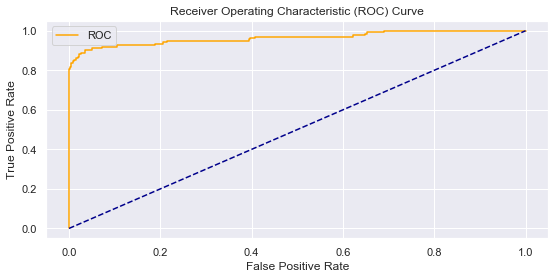

In [17]:
# calcular score AUC

probs = undersampled.predict_proba(X_test) # predecir probabilidades para X_test
probs_tp = probs[:, 1] # mantener solo las probabilidades de la clase positiva 
       
auc = roc_auc_score(y_test, probs_tp)  # calcular score AUC 

print('AUC: %.2f' % auc)

# calcular curva ROC

fpr, tpr, thresholds = roc_curve(y_test, probs_tp) # obtener curva ROC
plot_roc_curve(fpr, tpr)
    


### 5. Conclusiones

Para finalizar el laboratorio, debe realizar un análisis comparativo con los disintos resultados obtenidos  en los pasos 1-4. Saque sus propias conclusiones del caso.

Los modelos presentan diferencias, en particular se obtiene mayor precisión al utilizar **random forest** en comparación a **regresion logística** con y sin remuestreos, mientras que al realizar muestreos se incrementa la exhaustividad al realizar predicciones. Por otro lado, al comparar ambos remuestreos en la regresion logistica se puede extraer que al realizar un remuestreo el número de falsos negativos disminuye mientras que los falsos positivos aumentan ya sea al realizar remuestreo sobre la case minoritaria o sobremuestreo sobre la clase mayoritaria.

Desde las curvas y puntajes ROC se infiere que **random forest** es un modelo técnicamente más adecuado para predecir fraudes, aunque marginalmente (puntaje de 0.96 versus 0.92 en **regresion logística**).

Se puede recomendar utilizar un modelo adecuado dependiendo de si se desea maximizar precision o exhaustividad, o en su defecto utilizar un modelo con metrícas mas balanceadas respectivamente, en cuanto a predecir fraudes bancarios.